<a href="https://colab.research.google.com/github/WheelerMLClub/Python-and-Math-Review/blob/master/Regressions_with_scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lets start by doing regressions the easy way

In [80]:
#Import
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [81]:
#Gather our data
data = pd.read_csv("/content/sample_data/california_housing_train.csv")
X_data = data["total_bedrooms"]
y_data = data["total_rooms"]
c_map = data["median_house_value"]
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


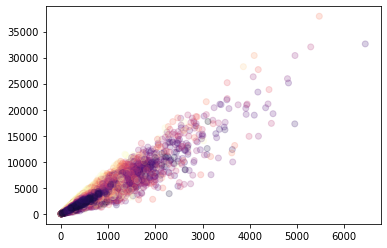

In [82]:
#Plot
plt.scatter(X_data,y_data,alpha=.2,cmap="magma",c=c_map)

In [83]:
#Shape data correctly
print(X_data.shape)
X_data = np.array(X_data).reshape(-1,1) # (training_examples,features)
y_data = np.array(y_data).reshape(-1) # (training_examples *there is only one feature*)

(17000,)


In [84]:
#Linear Regression
regression = LinearRegression().fit(X_data, y_data)

In [85]:
#Regression stats
score = regression.score(X_data,y_data) # R^2 score
theta = regression.coef_ #Coefficents
theta_0 = regression.intercept_ #y-intercept
print(score)
print(theta)
print(theta_0)

0.861932107787255
[4.80159432]
53.63246301698382


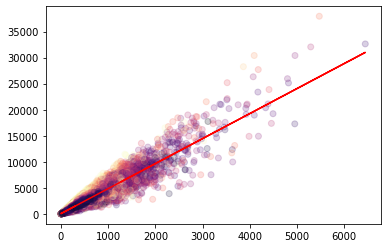

In [86]:
plt.scatter(X_data,y_data,alpha=.2,cmap="magma",c=c_map)
plt.plot(X_data,regression.predict(X_data),color="red")

Lets try a polynomial regression now


In [87]:
from sklearn.preprocessing import PolynomialFeatures
feature_maker = PolynomialFeatures(2)
X_2 = feature_maker.fit_transform(X_data)
Polynomial = LinearRegression()
Polynomial.fit(X_2,y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

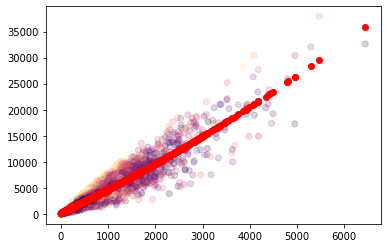

In [88]:
#Plot
plt.scatter(X_data,y_data,alpha=.2,cmap="magma",c=c_map)
plt.scatter(X_data,Polynomial.predict(X_2),color="red")

Classification vs Regression

In [89]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


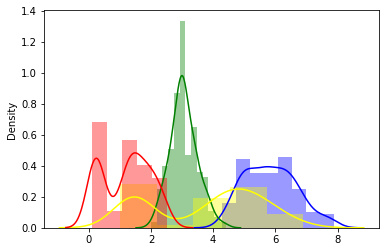

In [90]:
import seaborn as sns
sns.distplot(X[:,0],color="blue")
sns.distplot(X[:,1],color="green")
sns.distplot(X[:,2],color="yellow")
sns.distplot(X[:,3],color="red")
print(feature_names)

In [91]:
#Decision Trees
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
X = X[:,0:2]
clf = clf.fit(X, y)

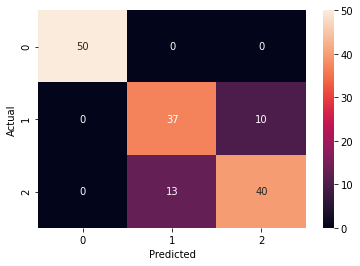

In [92]:
data = {'prediction':clf.predict(X), 'actual': y}
df = pd.DataFrame(data, columns=['prediction','actual'])
confusion_matrix = pd.crosstab(df['prediction'], df['actual'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [93]:
# Lets visualize it!

import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris") 

'iris.pdf'

In [94]:
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=iris.feature_names[0:2],  class_names=iris.target_names,  filled=True, rounded=True, special_characters=True)  

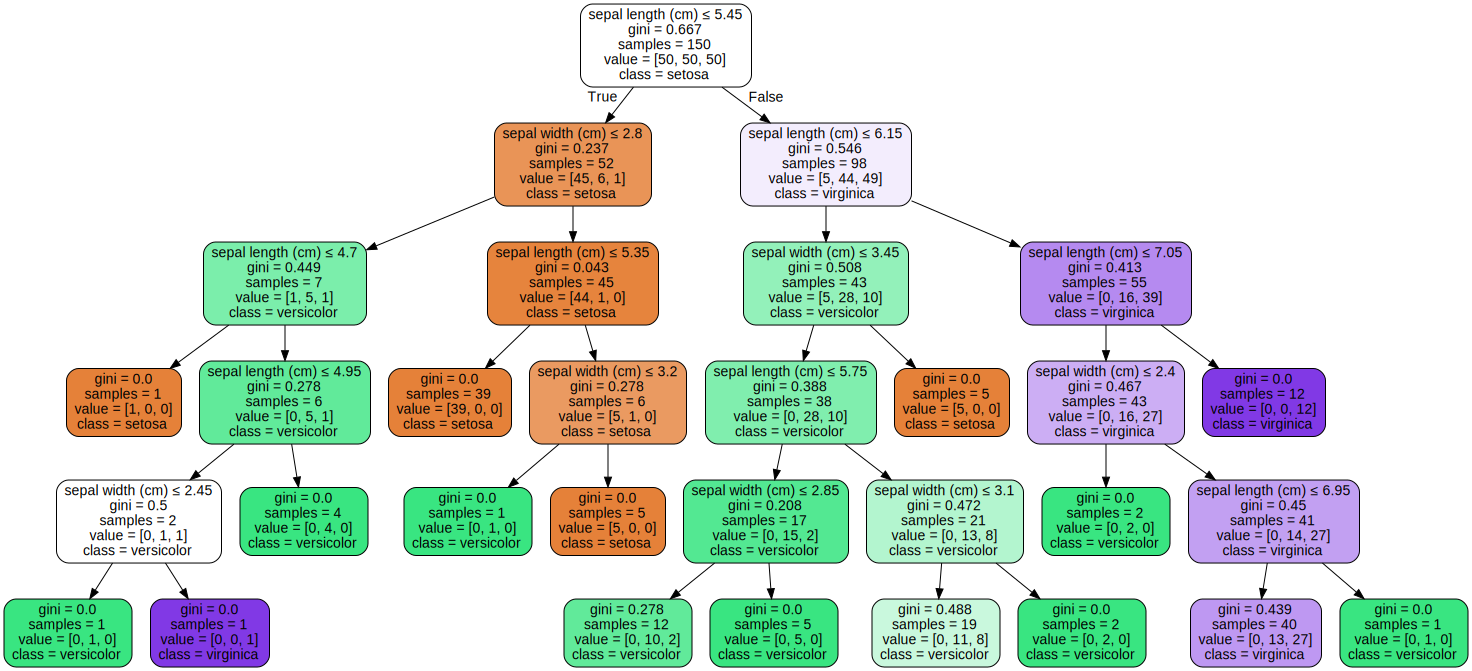

In [95]:
graph = graphviz.Source(dot_data)
graph 

In [96]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=20, random_state=0,n_estimators=1000)
clf = clf.fit(X, y)

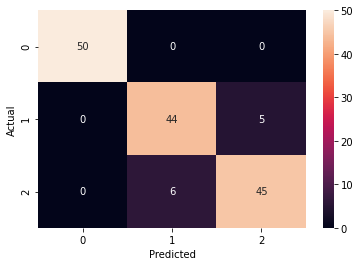

In [97]:
data = {'prediction':clf.predict(X), 'actual': y}
df = pd.DataFrame(data, columns=['prediction','actual'])
confusion_matrix = pd.crosstab(df['prediction'], df['actual'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [98]:
# You can also use random forest with regressions though neural networks are
# better suited.

In [ ]:
data = pd.read_csv("/content/sample_data/california_housing_train.csv")
X_data = data["total_bedrooms"]
y_data = data["total_rooms"]
c_map = data["median_house_value"]

#Your code to fit the DescisionTreeRegressor here!


